In [1]:
#Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the excel file

In [3]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1cxC4DKIznDAglLLUsIkdGwjWtIfBNsOX5MM4j8qNfAE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carfuelconsumption-donotdelete-pr-fg1kawzchyykmv'
object_key = 'measurements2.xlsx'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']

df= pd.read_excel(body.read())
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [5]:
df.shape

(388, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [7]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [8]:
#Check Null Values

In [9]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [10]:
#Remove the null values

In [11]:
df.drop(['specials','refill liters','refill gas'],axis=1,inplace=True)

In [12]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


In [13]:
#Handling the null values

In [14]:
mn = df.temp_inside.mean()
mn

21.929521276595743

In [15]:
med = df.temp_inside.median()
med

22.0

In [16]:
df['temp_inside']=df.temp_inside.fillna(mn)

In [17]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [18]:
df.head(5)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [19]:
#Descriptive Statistics

In [20]:
df[['distance','consume','speed','temp_inside',
   'temp_outside']].mean()

distance        19.652835
consume          4.912371
speed           41.927835
temp_inside     21.929521
temp_outside    11.358247
dtype: float64

In [21]:
df[['distance','consume','speed','temp_inside',
   'temp_outside']].median()

distance        14.6
consume          4.7
speed           40.5
temp_inside     22.0
temp_outside    10.0
dtype: float64

In [22]:
df[['gas_type','AC','rain','sun']].mode()

,gas_type,AC,rain,sun
0,SP98,0,0,0


In [23]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [24]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


<AxesSubplot:xlabel='distance', ylabel='Count'>

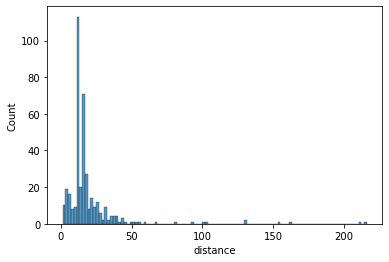

In [25]:
sns.histplot(df.distance)

<AxesSubplot:xlabel='distance', ylabel='Density'>

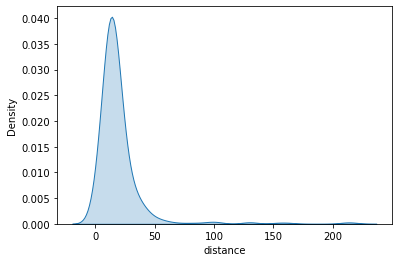

In [26]:
sns.kdeplot(df.distance,shade=True)

<AxesSubplot:xlabel='speed', ylabel='Count'>

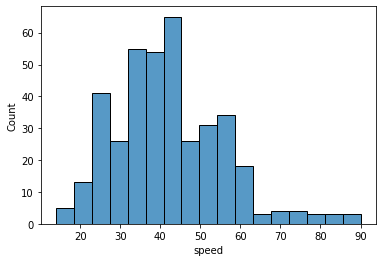

In [27]:
sns.histplot(df.speed)

<AxesSubplot:xlabel='speed', ylabel='Density'>

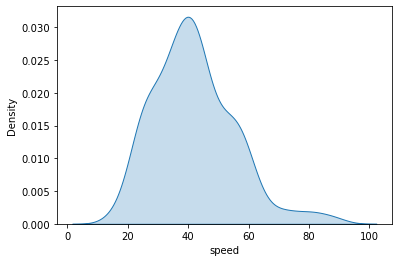

In [28]:
sns.kdeplot(df.speed,shade=True)

<AxesSubplot:xlabel='temp_inside', ylabel='Count'>

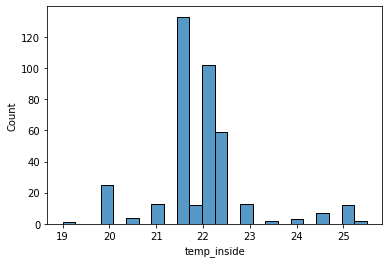

In [29]:
sns.histplot(df.temp_inside)

<AxesSubplot:xlabel='temp_inside', ylabel='Density'>

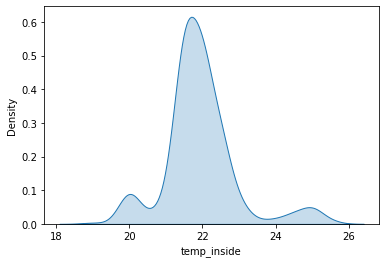

In [30]:
sns.kdeplot(df.temp_inside,shade=True)

<AxesSubplot:xlabel='temp_outside', ylabel='Count'>

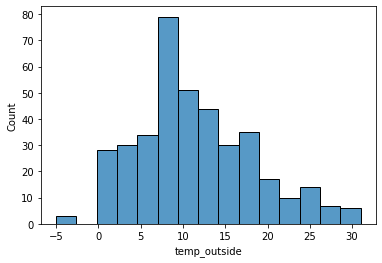

In [31]:
sns.histplot(df.temp_outside)

<AxesSubplot:xlabel='temp_outside', ylabel='Density'>

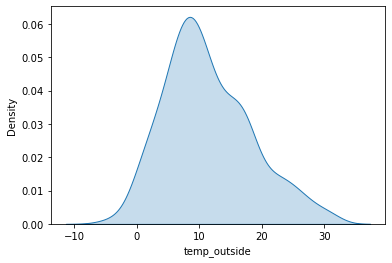

In [32]:
sns.kdeplot(df.temp_outside,shade=True)

In [33]:
df.head(1)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

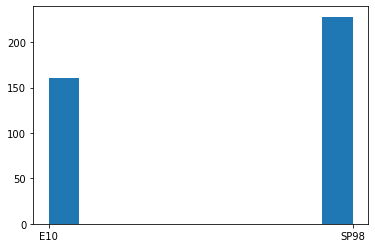

In [34]:
plt.hist(df.gas_type)

<AxesSubplot:>

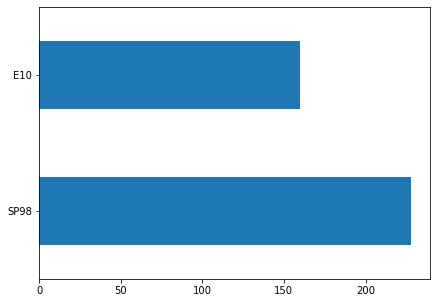

In [35]:
plt.figure(figsize=(7,5))
df.gas_type.value_counts().plot(kind='barh')

(array([  3.,  28.,  43., 100.,  68.,  57.,  43.,  19.,  19.,   8.]),
 array([-5. , -1.4,  2.2,  5.8,  9.4, 13. , 16.6, 20.2, 23.8, 27.4, 31. ]),
 <BarContainer object of 10 artists>)

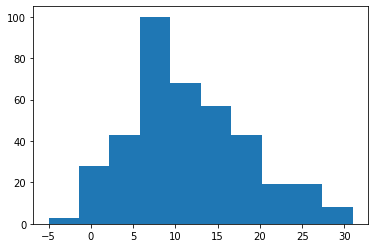

In [36]:
plt.hist(df.temp_outside)

<AxesSubplot:>

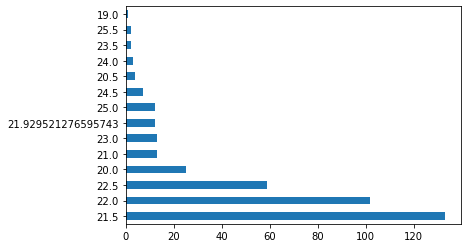

In [37]:
df.temp_inside.value_counts().plot(kind='barh')

(array([  1.,  25.,   4., 146., 114.,  59.,  15.,   3.,   7.,  14.]),
 array([19.  , 19.65, 20.3 , 20.95, 21.6 , 22.25, 22.9 , 23.55, 24.2 ,
        24.85, 25.5 ]),
 <BarContainer object of 10 artists>)

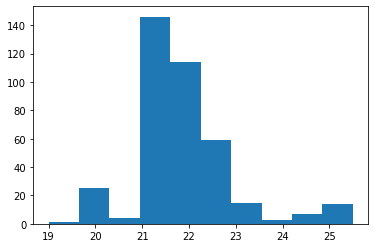

In [38]:
plt.hist(df.temp_inside)

In [39]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


In [40]:
#Bivariate Analysis

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

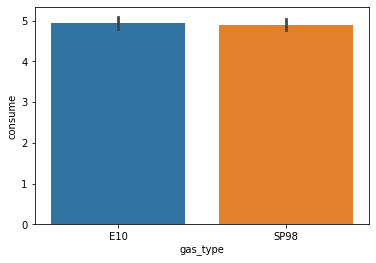

In [41]:
sns.barplot(x='gas_type',y='consume',data=df)

<AxesSubplot:xlabel='temp_outside', ylabel='consume'>

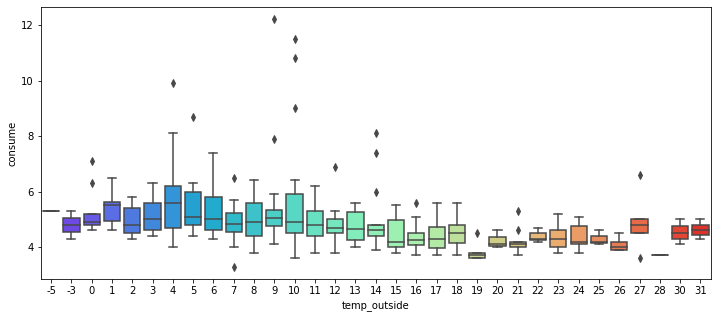

In [42]:
plt.figure(figsize=(12,5))
sns.boxplot(x='temp_outside',y='consume',data=df,palette='rainbow')

In [43]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


<AxesSubplot:xlabel='gas_type', ylabel='consume'>

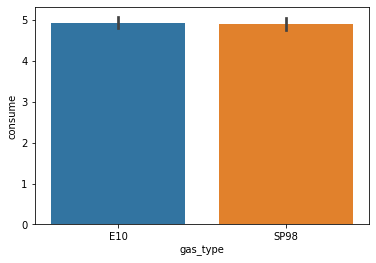

In [44]:
sns.barplot(x='gas_type',y='consume',data=df)

<AxesSubplot:xlabel='AC', ylabel='consume'>

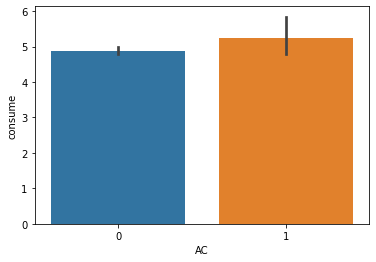

In [45]:
sns.barplot(x='AC',y='consume',data=df)

<AxesSubplot:xlabel='rain', ylabel='consume'>

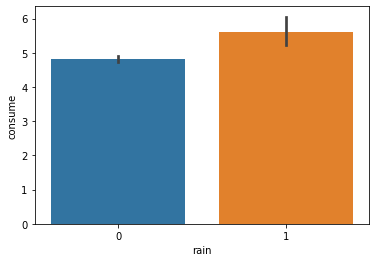

In [46]:
sns.barplot(x='rain',y='consume',data=df)

<AxesSubplot:xlabel='sun', ylabel='consume'>

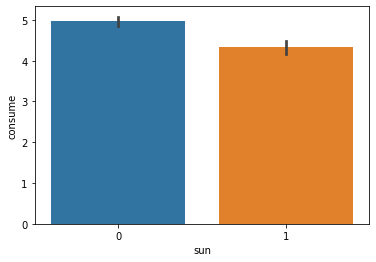

In [47]:
sns.barplot(x='sun',y='consume',data=df)

In [48]:
#Multivariate Analysis

<AxesSubplot:>

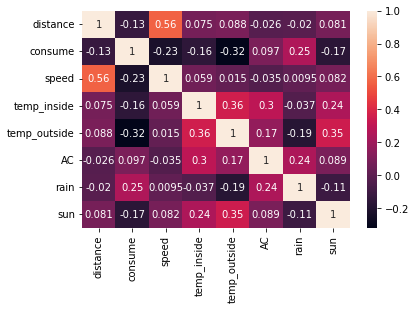

In [49]:
sns.heatmap(df.corr(),annot=True)

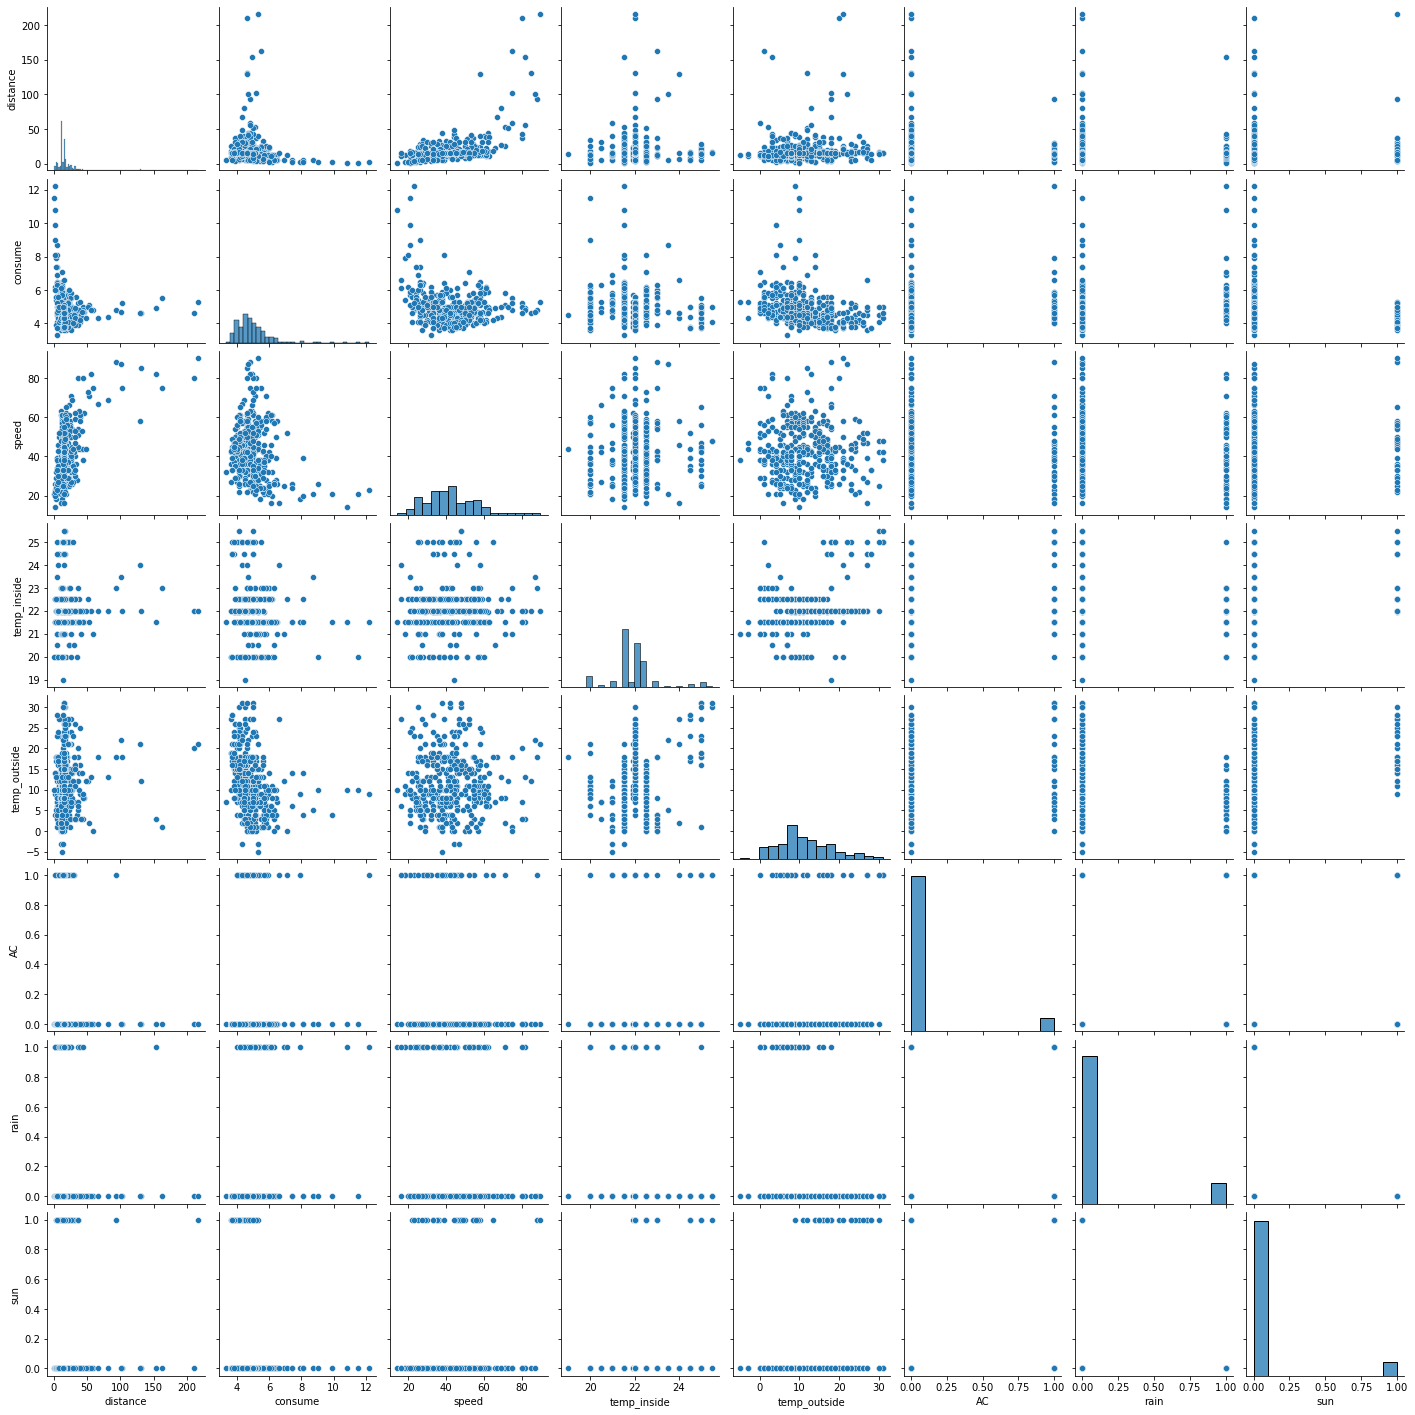

In [50]:
sns.pairplot(df)

In [51]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le=LabelEncoder()

In [54]:
df['gas_types']=le.fit_transform(df.gas_type)

In [55]:
df.drop('gas_type',axis=1,inplace=True)

In [56]:
df.head(2)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_types
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0


In [57]:
x=df.drop(['consume'],axis=1)
y=df.consume

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                              random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
linear_reg=LinearRegression()

In [62]:
linear_reg.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=linear_reg.predict(x_test)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [65]:
mean_absolute_error(y_test,y_pred)

0.6689496242764844

In [66]:
mean_squared_error(y_test,y_pred)

0.7476946880297471

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.8646934069540181

In [68]:
import pickle

In [69]:
pickle.dump(linear_reg,open('model.pkl','wb'))

In [70]:
import joblib
joblib.dump(linear_reg,'model.save')

['model.save']

In [71]:
y

0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
383    3.7
384    4.3
385    3.8
386    4.6
387    5.0
Name: consume, Length: 388, dtype: float64

In [72]:
x

,distance,speed,temp_inside,temp_outside,AC,rain,sun,gas_types
0,28.0,26,21.5,12,0,0,0,0
1,12.0,30,21.5,13,0,0,0,0
2,11.2,38,21.5,15,0,0,0,0
3,12.9,36,21.5,14,0,0,0,0
4,18.5,46,21.5,15,0,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,39,24.5,18,0,0,0,1
384,16.1,38,25.0,31,1,0,0,1
385,16.0,45,25.0,19,0,0,0,1
386,15.4,42,25.0,31,1,0,0,1


In [74]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": ""
}

client = APIClient(wml_credentials)

In [75]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [77]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = 85addd7e-eec2-40e5-b535-55e72db5f0d5


In [78]:
client.set.default_space(space_uid)

'SUCCESS'

In [79]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [80]:
#Set Python Version
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [81]:
model_details = client.repository.store_model(model = linear_reg, meta_props={
    client.repository.ModelMetaNames.NAME: "Fuel_Consumption_Predictor",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}
)

model_id = client.repository.get_model_id(model_details)


In [82]:
model_id

'fcb1c6ac-70ef-4328-99e0-08ff8383f248'

In [83]:
x_train

,distance,speed,temp_inside,temp_outside,AC,rain,sun,gas_types
24,12.3,62,21.500000,6,0,0,0,0
379,16.7,44,24.500000,23,0,0,1,1
339,15.4,45,22.000000,24,0,0,0,0
272,101.9,75,22.000000,18,0,0,0,0
286,37.2,45,22.000000,20,0,0,1,1
...,...,...,...,...,...,...,...,...
71,2.0,20,21.500000,10,0,0,0,1
106,162.7,75,23.000000,1,0,0,0,1
270,16.0,41,22.000000,12,0,0,0,0
348,16.6,50,22.000000,25,0,0,0,0


In [84]:
linear_reg.predict(x_train)

array([4.63316679, 3.87622773, 4.33028459, 4.2701725 , 4.44282871,
       4.95639785, 4.96959208, 5.01949122, 4.54112654, 4.23591215,
       5.64385866, 4.23364588, 5.06455456, 4.92989925, 4.87730078,
       4.79903757, 5.7898154 , 5.82487052, 4.22805703, 5.34836897,
       4.95110175, 4.47933169, 4.4658166 , 3.94399162, 5.34582247,
       5.49912911, 5.63417817, 4.66099524, 4.88665448, 4.73252327,
       4.96231128, 5.1886402 , 4.00501376, 5.88885846, 5.14792846,
       4.7566401 , 5.03605525, 5.02386121, 5.11109543, 4.42746517,
       5.6871449 , 5.67534661, 4.93004225, 6.21887511, 4.06926191,
       4.78719333, 5.64326503, 5.17722085, 4.71511409, 5.09877172,
       4.70441464, 5.09266909, 4.59420993, 5.01604008, 5.43918343,
       5.46325819, 5.08826877, 4.66574991, 4.6455316 , 5.40622772,
       4.02239364, 5.56194404, 4.89313089, 4.42638566, 5.28949158,
       4.9416896 , 4.87848001, 5.49136088, 4.37851825, 4.36967766,
       4.63836001, 5.00390737, 4.18004193, 3.79555247, 4.76440

In [86]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account.
API_KEY = ""
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"input_data": [{"field": [["distance","speed","temp_inside","temp_outside","AC","rain","sun","gas_types"]], "values": [[28.0,26,21.5,12,0,0,0,0]]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/3539e00f-b9bc-4d3f-9ad1-6778d1ad0121/predictions?version=2022-11-14', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'predictions': [{'fields': ['prediction'], 'values': [[5.364372012135133]]}]}
